In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing necessary libraries


In [4]:
import numpy as np
import os
import PIL
import tensorflow as tf
from skimage import io
from PIL import Image
import random
import cv2
import matplotlib.pyplot as plt

#Using Bing search engine to search specific class of images of our interest

In [ ]:
'''
!pip install bing-image-downloader
from bing_image_downloader import downloader

#below line, write the term on how you can get the image class.
downloader.download("human portrait image with neutral face", limit=50,  output_dir='/content/drive/MyDrive/Applied AI/scraped/neutral', #create a folder inside your drive named 'insect', limit = 50 means you will get 50 relevant images from search
                    adult_filter_off=True, force_replace=False)

'''

#Pre-processing

**rename files within a folder**

In [25]:
# we renamed each image classes in separate folder for future use
path = os.chdir("/content/drive/MyDrive/Applied AI/train/neutral")
#set your path


i=0
for file in os.listdir(path):

    new_file_name="neutral{}.jpg".format(i)
    os.rename(file, new_file_name)

    i=i+1

**counting files in folders**

In [27]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/drive/MyDrive/Applied AI/train/')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/drive/MyDrive/Applied AI/train/"))
file_count = len(files)
# print(file_count)

['neutral', 'engaged', 'bored', 'angry']


**number of training images**

In [38]:
for i in ['bored', 'neutral', 'engaged', 'angry']:
    print('number of training "{}" images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Applied AI/train/'+i+'/'))))


number of training "bored" images are: 439
number of training "neutral" images are: 433
number of training "engaged" images are: 436
number of training "angry" images are: 448


**number of test images**

In [41]:
for i in ['bored', 'neutral', 'engaged', 'angry']:
    print('number of test "{}" images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Applied AI/test/'+i+'/'))))

number of test "bored" images are: 150
number of test "neutral" images are: 150
number of test "engaged" images are: 150
number of test "angry" images are: 150


#converting RGB to Grey and into 224x224 pixel size

In [29]:
'''

import os
import cv2
import numpy as np

# Path to the folder containing RGB images
input_folder = '/content/drive/MyDrive/Applied AI/scraped/angry'  # Replace 'your_input_folder' with your folder path

# Output folder for resized grayscale images
output_folder = '/content/drive/MyDrive/Applied AI/scraped_resized/angry'  # Replace with your desired output folder path

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# List all files in the input folder
image_files = os.listdir(input_folder)

for image_file in image_files:
    # Load the RGB image
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is not None:
        # Display the original RGB image
        #cv2.imshow("Original RGB Image", image)

        # Convert the RGB image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Display the grayscale image
        #cv2.imshow("Grayscale Image", gray_image)

        # Resize the grayscale image to 224x224 pixels
        resized_gray_image = cv2.resize(gray_image, (224, 224))

        # Display the resized grayscale image
        #cv2.imshow("Resized Grayscale Image", resized_gray_image)

        # Save the resized grayscale image in the output folder
        output_path = os.path.join(output_folder, image_file)
        cv2.imwrite(output_path, resized_gray_image)

        # Wait for a key press and then close the image windows
        cv2.waitKey(0)
        cv2.destroyAllWindows()

# Print a message when all images are processed
print("All images processed and saved in the output folder.")


'''

'\n\nimport os\nimport cv2\nimport numpy as np\n\n# Path to the folder containing RGB images\ninput_folder = \'/content/drive/MyDrive/Applied AI/scraped/angry\'  # Replace \'your_input_folder\' with your folder path\n\n# Output folder for resized grayscale images\noutput_folder = \'/content/drive/MyDrive/Applied AI/scraped_resized/angry\'  # Replace with your desired output folder path\n\n# Create the output folder if it doesn\'t exist\nos.makedirs(output_folder, exist_ok=True)\n\n# List all files in the input folder\nimage_files = os.listdir(input_folder)\n\nfor image_file in image_files:\n    # Load the RGB image\n    image_path = os.path.join(input_folder, image_file)\n    image = cv2.imread(image_path)\n    \n    # Check if the image was loaded successfully\n    if image is not None:\n        # Display the original RGB image\n        #cv2.imshow("Original RGB Image", image)\n        \n        # Convert the RGB image to grayscale\n        gray_image = cv2.cvtColor(image, cv2.COLOR_B

#visualizing the dataset

showing the class distribution

Text(0.5, 1.0, 'Distribution of different classes for training')

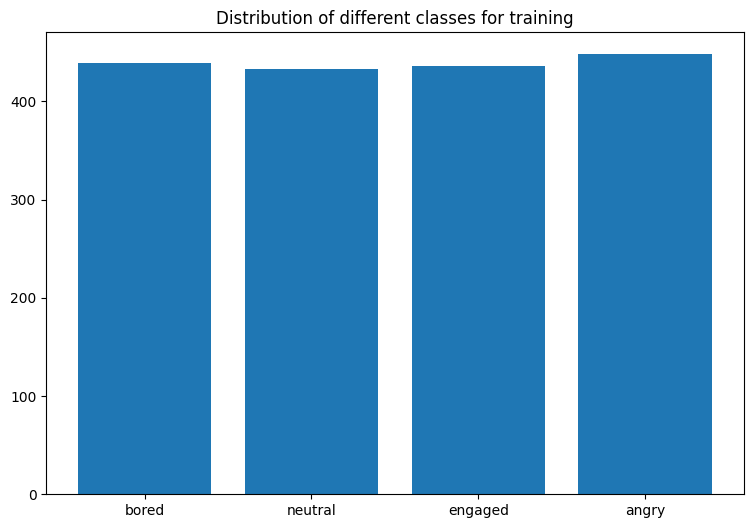

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['bored', 'neutral', 'engaged', 'angry']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Applied AI/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes for training')

Text(0.5, 1.0, 'Distribution of different classes for testing')

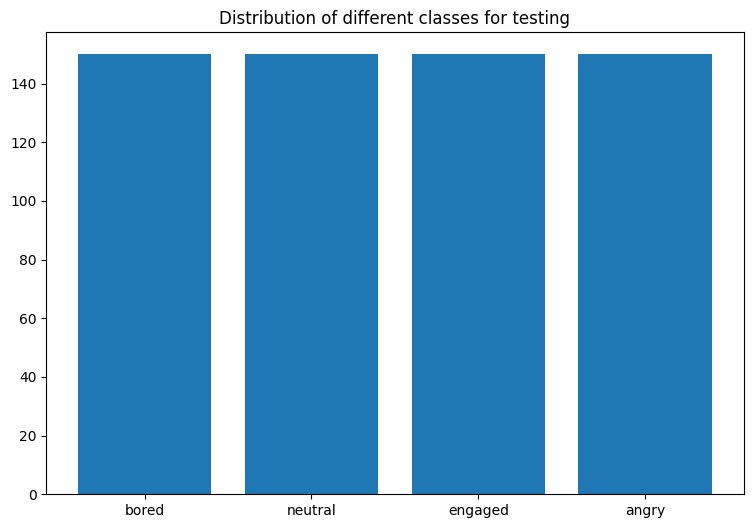

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['bored', 'neutral', 'engaged', 'angry']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Applied AI/test/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes for testing')

showing sample images in 5x5 grid

<Figure size 850x1100 with 0 Axes>

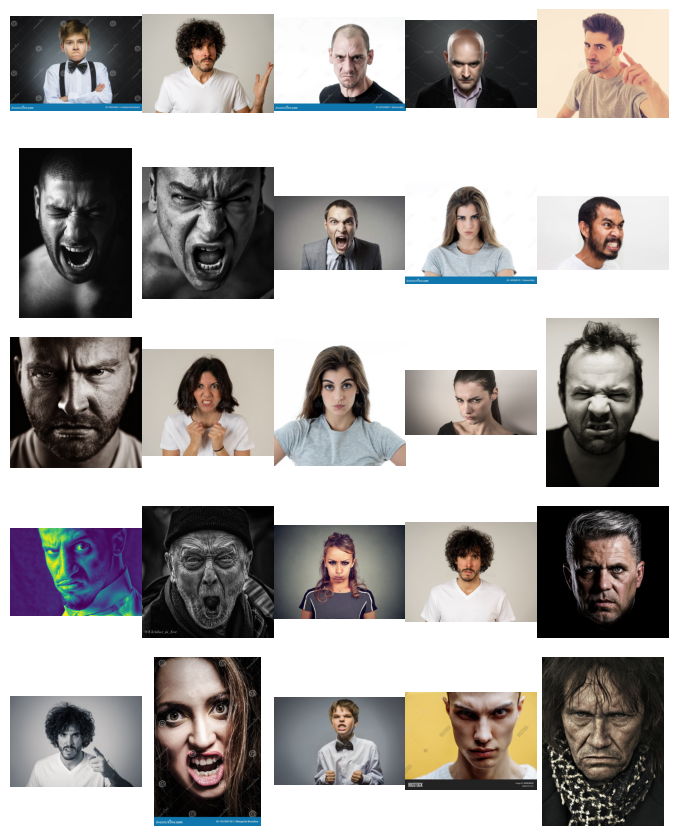

In [33]:
import os
import random
import matplotlib.pyplot as plt

# Set the page size to letter size (8.5x11 inches)
plt.figure(figsize=(8.5, 11))

# Define the grid size
grid_rows = 5
grid_cols = 5

# Define the directory containing subdirectories for each class
data_dir = '/content/drive/MyDrive/Applied AI/scraped/'  # Replace with your data directory path

# Create a list of class directories
class_directories = [os.path.join(data_dir, d) for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# Initialize the grid
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(8.5, 11))
fig.subplots_adjust(hspace=0, wspace=0)

# Shuffle the class directories to randomly select images from each class
random.shuffle(class_directories)

# Initialize the image counter
image_count = 0

# Loop through the class directories and select one image from each class
for i, class_dir in enumerate(class_directories[:4]):
    # List all image files in the class directory
    image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg')]

    # Randomly choose one image from the class
    random.shuffle(image_files)
    for image_file in image_files:
        if image_count < grid_rows * grid_cols:
            # Load and display the image in the grid
            img_path = os.path.join(class_dir, image_file)
            img = plt.imread(img_path)
            axes[image_count // grid_cols, image_count % grid_cols].imshow(img)
            axes[image_count // grid_cols, image_count % grid_cols].axis('off')
            image_count += 1

# Remove any remaining empty subplots
for i in range(image_count, grid_rows * grid_cols):
    fig.delaxes(axes[i // grid_cols, i % grid_cols])

# Save the grid as an image
plt.savefig('/content/drive/MyDrive/Applied AI/scraped/image_grid.png', bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()


to create a histogram

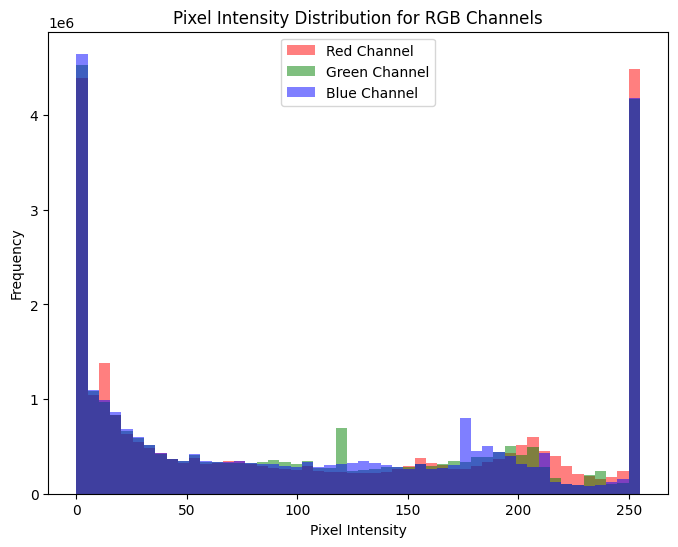

In [35]:
#showing the distribution of pixel intensities for the red, green, and blue channels of the 25 random images and overlay these intensity distributions on a single histogram

import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np
# Define the directory containing subdirectories for each class
data_dir = '/content/drive/MyDrive/Applied AI/scraped'  # Replace with your data directory path

# Create a list of class directories
class_directories = [os.path.join(data_dir, d) for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# Initialize lists to store pixel intensities for each channel
red_channel_intensities = []
green_channel_intensities = []
blue_channel_intensities = []

# Shuffle the class directories to randomly select images from each class
random.shuffle(class_directories)

# Initialize the image counter
image_count = 0

# Loop through the class directories and select one image from each class
for i, class_dir in enumerate(class_directories[:4]):
    # List all image files in the class directory
    image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg')]

    # Randomly choose one image from the class
    random.shuffle(image_files)
    for image_file in image_files:
        if image_count < 25:
            # Load and process the image
            img_path = os.path.join(class_dir, image_file)
            img = cv2.imread(img_path)

            # Extract channel intensities
            red_channel = img[:, :, 2].ravel()
            green_channel = img[:, :, 1].ravel()
            blue_channel = img[:, :, 0].ravel()

            # Append channel intensities to the lists
            red_channel_intensities.extend(red_channel)
            green_channel_intensities.extend(green_channel)
            blue_channel_intensities.extend(blue_channel)

            image_count += 1

# Create a histogram with overlaid channels
plt.figure(figsize=(8, 6))
plt.hist(red_channel_intensities, bins=50, color='red', alpha=0.5, label='Red Channel')
plt.hist(green_channel_intensities, bins=50, color='green', alpha=0.5, label='Green Channel')
plt.hist(blue_channel_intensities, bins=50, color='blue', alpha=0.5, label='Blue Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.title('Pixel Intensity Distribution for RGB Channels')
plt.show()
